# Script to produce CCA S2S forecasts and assess associated skill
#### Authors: 
Andrew W. Robertson (awr@iri.columbia.edu) and Ángel G. Muñoz

#### Acknowledgements (some Python functions and Ingrid code): 
Remi Cousin, James Doss-Gollin

#### Version info
* This version: 17 Jul 2018, Modified by AWR
* First version: 12 Dec 2017; First IPython version (Jupyter Notebook), 24 Jun 2018

#### Output:
* Several skill maps for assessment of deterministic forecast, in the output folder.
* CPT scripts used to assess skill, in the scripts folder.
* Downloaded input files, in the input folder.

#### Notes:
1. Old data in the input folder is deleted at the beginning of the process!
2. Weekly initializations available per month are used, concatenated.
3. The T coordinate has been faked, so CPT can deal with all the initializations.


### Namelist section
----------------------

In [1]:
# Forecast date
mon='Jul' 	# Forecast month 
fyr=2018 	# Forecast year
fday=16 	# Forecast day  (Yesterday in real time)
training_season='Jun-Aug'

hstep = 3 # use all starts in the trainng period with this daily step between them (v5 used 7)
nlag = 3  # length of the lagged ensemble in days
ntrain = 371  # Length of training period 

# Rainfall frequency switch (False gives total rainfall for forecast period)
rainfall_frequency = True
# Wet day threshold (mm)
wetday_threshold = 3

# GrADS plotting switches True/False
# If first switch is False, output will be in CPTv10 format  
grads_plot = True
grads_plot_forecasts = True
grads_plot_skill = True

# Desired skill score, choose from: Spearman, 2AFC, RocAbove, RocBelow
#skill_score = '2AFC'

# Spatial domain for predictor
nla1=32 	# Northernmost latitude
sla1=12 	# Southernmost latitude
wlo1=74 	# Westernmost longitude
elo1=92 	# Easternmost longitude
# Spatial domain for predictand
nla2=27 	# Northernmost latitude
sla2=22 	# Southernmost latitude
wlo2=80 	# Westernmost longitude
elo2=89 	# Easternmost longitude

# Working directory
workdir = '/Users/agmunoz/Documents/Angel/S2S_PredictionProject/4CPT'

# PATH to CPT root directory
cptdir='/Users/agmunoz/Documents/Angel/CPT/CPT/15.7.6/'

# S2S Database key
%cd $workdir
with open('.IRIDLAUTH') as file:
    authkey = file.read() 

/Users/agmunoz/Documents/Angel/S2S_PredictionProject/4CPT


In [2]:
# Forecast lead interval
# Lists for looping over lead times
wk = [1,2,34]  # week-lead number label (week1, week2, week3-4)
day1 = [3,10,17]  # first lead day of target weeks 
day2 = [9,16,30]  # last lead day of target weeks 

# Naming of output files
if rainfall_frequency:
    fprefix = 'RFREQ'
else:
    fprefix = 'PRCP'

### End of namelist section  (do not modify anything below this line)
----------------------

#### Load Libraries

In [3]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import calendar
from pycpt_functions import *

In [4]:
if rainfall_frequency:
    print('Predictand is Rainfall Frequency; wet day threshold = '+str(wetday_threshold))
else:
    print('Predictand is Rainfall Total')
    
print("Creating working folders, if not already there...")
print("Work directory is:")
%cd $workdir
!mkdir -p input
!mkdir -p output
!mkdir -p scripts
#!rm -Rf input/model_*.tsv input/obs_*.tsv  #comment if deletion of old input files is not desired.
!rm -Rf scripts/*

Predictand is Rainfall Frequency; wet day threshold = 3
Creating working folders, if not already there...
Work directory is:
/Users/agmunoz/Documents/Angel/S2S_PredictionProject/4CPT


## Check if domains are ok --if you don't like them, go back to namelist and modify domains

     July 2018
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30 31



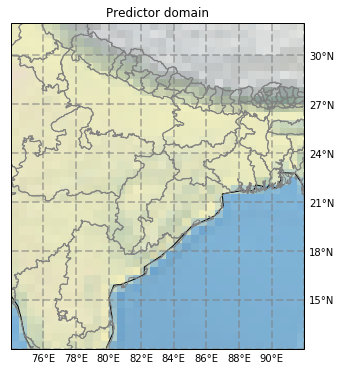

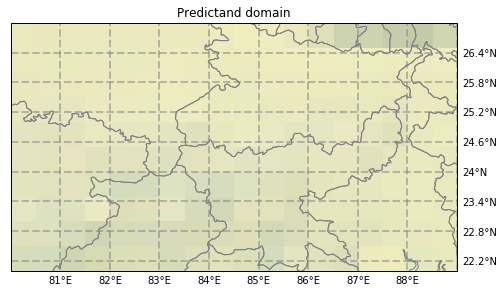

In [5]:
pltdomain(wlo1,elo1,nla1,sla1,'Predictor domain')
pltdomain(wlo2,elo2,nla2,sla2,'Predictand domain')

#Print calendar
c=calendar.TextCalendar(calendar.MONDAY)
print(c.formatmonth(fyr,list(calendar.month_abbr).index(mon)))

In [6]:
for L in range(1):
   nday=day2[L]-day1[L]+1	# Length of target period (days) 
   %cd $workdir/input
   #GetHindcasts(wlo1, elo1, sla1, nla1, day1[L], day2[L], mon, os, authkey, wk[L], nlag, training_season, hstep)
   print('Done getting hindcasts')
   if rainfall_frequency: 
        #GetObs_RFREQ(day1[L], day2[L], mon, nday, authkey, wk[L], wetday_threshold, nlag, training_season, hstep)
        print('Done getting obs - rfreq')
   else:
        #GetObs(day1[L], day2[L], mon, nday, authkey, wk[L], nlag, training_season, hstep)
        print('Done getting obs - precip')
   #GetForecast(day1[L], day2[L], fday, mon, fyr, nday, wlo1, elo1, sla1, nla1, authkey, wk[L], nlag)
   print('Done getting forecasts')
 
   %cd $workdir/scripts

   wkf=wk[L]
   CPTscript(mon,fday,wkf,nla1,sla1,wlo1,elo1,nla2,sla2,wlo2,elo2,fprefix,training_season,ntrain,rainfall_frequency,grads_plot)

   # Set up CPT environment
   os.environ["CPT_BIN_DIR"] = cptdir
   print("CPT environment loaded...")

   print('Executing CPT for Week '+str(wk[L])+'...')
   os.system(cptdir+'CPT.x < params > CPT_stout_train_'+training_season+'_'+mon+'_'+str(fday)+'_wk'+str(wk[L])+'.txt')
   print('----------------------------------------------')
   print('Week '+str(wk[L])+' calculations completed! See output folder')
   #get_ipython().system('grep CPT_stout_train_'+training_season+'_'+mon+'_'+str(fday)+'_wk'+str(wk[L])+'.txt | Error')

/Users/agmunoz/Documents/Angel/S2S_PredictionProject/4CPT/input
Done getting hindcasts
Done getting obs - rfreq
Done getting forecasts
/Users/agmunoz/Documents/Angel/S2S_PredictionProject/4CPT/scripts
CPT environment loaded...
Executing CPT for Week 1...
----------------------------------------------
Week 1 calculations completed! See output folder


## Skill maps

/Users/agmunoz/Documents/Angel/S2S_PredictionProject/4CPT/output


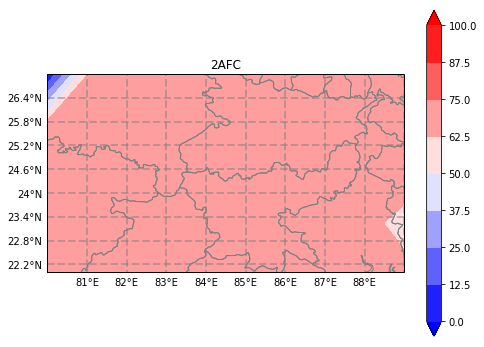

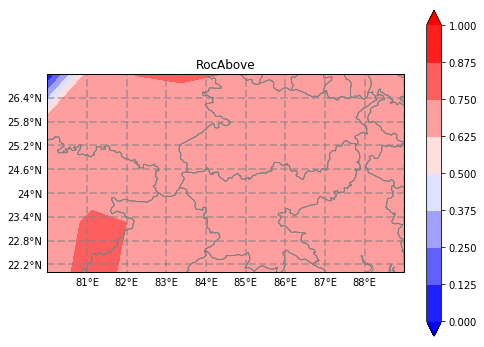

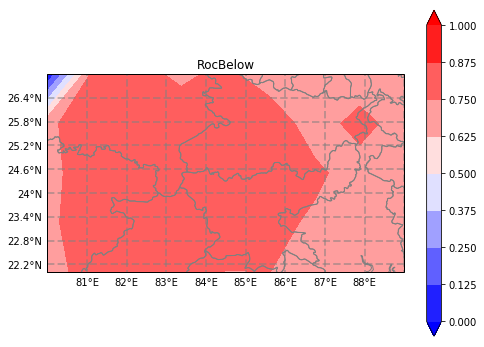

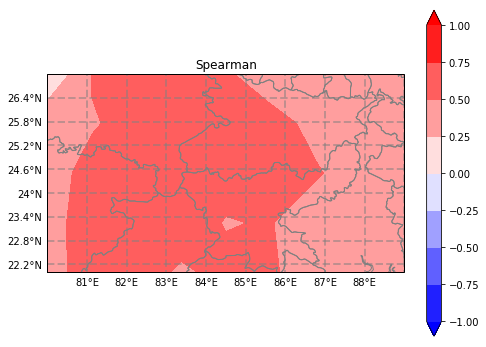

In [5]:
%cd $workdir/output

pltmap('2AFC',wlo2,elo2,nla2,sla2)    
pltmap('RocAbove',wlo2,elo2,nla2,sla2)
pltmap('RocBelow',wlo2,elo2,nla2,sla2)
pltmap('Spearman',wlo2,elo2,nla2,sla2)

## Forecast maps

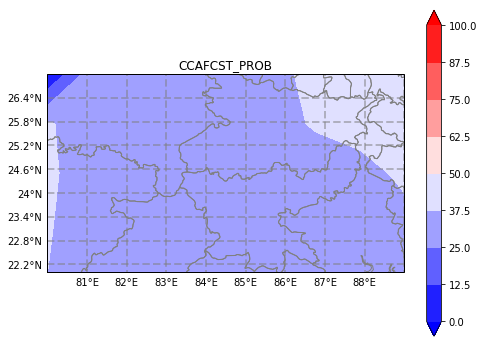

In [6]:
pltmap('CCAFCST_PROB',wlo2,elo2,nla2,sla2)